In [8]:
a = import_graph()
a
#i = a[:, 0]-1
#j = a[:, 1]-1
#j
#v = np.ones((a.shape[0], 1)).flatten()

array([[  1,   2],
       [  3,   4],
       [  5,   6],
       ...,
       [221, 178],
       [ 90, 170],
       [ 82, 245]])

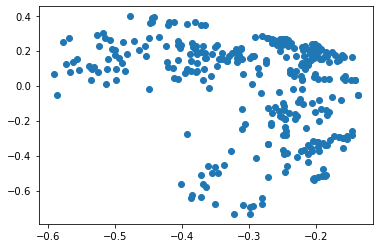

(321,)


In [12]:
import os
import numpy as np
from os.path import abspath, exists
from scipy import sparse
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


def output_file(a, idx2name, c_idx):
    dirpath = os.getcwd()
    node_file = dirpath + '//nodes.csv'
    edge_file = dirpath + '//edges.csv'

    with open(edge_file, 'w') as fid:
        fid.write('Source\tTarget\n')
        for i in range(len(a)):
            fid.write(f'{a[i,0]}\t{a[i,1]}\n')

    with open(node_file, 'w') as fid:
        fid.write('Id\tLabel\tColor\n')
        for i in range(len(idx2name)):
            fid.write(f'{i}\t{idx2name[i]}\t{c_idx[i]}\n')


def read_team_name():
    # read inverse_teams.txt file
    f_path = abspath("inverse_teams.txt")
    idx2name = []
    if exists(f_path):
        with open(f_path) as fid:
            for line in fid.readlines():
                name = line.split("\t", 1)[1]
                idx2name.append(name[:-1])
    return idx2name


def import_graph():
    # read the graph from 'play_graph.txt'
    f_path = abspath("play_graph.txt")
    if exists(f_path):
        with open(f_path) as graph_file:
            lines = [line.split() for line in graph_file]
    return np.array(lines).astype(int)


def main():
    # spectral clustering
    n = 321
    k = 13

    # load the graph
    a = import_graph()

    i = a[:, 0]-1
    j = a[:, 1]-1
    v = np.ones((a.shape[0], 1)).flatten()

    A = sparse.coo_matrix((v, (i, j)), shape=(n, n))
    A = (A + np.transpose(A))/2

    D = np.diag(1/np.sqrt(np.sum(A, axis=1)).A1)
    L = D @ A @ D

    v, x = np.linalg.eig(L)
    x = x[:, 0:k].real
    x = x/np.repeat(np.sqrt(np.sum(x*x, axis=1).reshape(-1, 1)), k, axis=1)

    # scatter
    plt.scatter(x[:, 0], x[:, 1])
    plt.show()

    # k-means
    kmeans = KMeans(n_clusters=k).fit(x)
    c_idx = kmeans.labels_

    (unique, counts) = numpy.unique(number_list, return_counts=True)
    

if __name__ == '__main__':
    main()